# Software Defect Prediction - Data Cleaning and Preprocessing

This notebook focuses on cleaning and preprocessing the dataset for software defect prediction in aerospace systems.

In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.0 MB ? eta -:--:--Downloading pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 191.3 kB/s  0:00:51m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 191.3 kB/s  0:00:51
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/16.6 MB ? eta -:--:--Downloading numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 451.4 kB/s  0:00:48m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 451.4 kB/s  0:00:48
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.7 MB ? eta -:--:--Downloading matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.2 MB/s  0:00:06 eta 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.2 MB/s  0:00:06
   ━━━━━━━━━━━

In [ ]:
# Import necessary libraries
# Used for data manipulation and analysis (works well with tabular data)
import pandas as pd

# Provides support for numerical operations, arrays, and matrices
import numpy as np

# Used for creating static, animated, and interactive visualizations (basic plotting)
import matplotlib.pyplot as plt

# Built on matplotlib, provides high-level interface for statistical data visualization (more attractive plots)
import seaborn as sns

# Scales features so they have mean = 0 and variance = 1 (standardization)
from sklearn.preprocessing import StandardScaler

# Scales features to a given range (usually [0, 1]) (normalization)
from sklearn.preprocessing import MinMaxScaler

# Handles missing values by replacing them with a specified strategy (mean, median, mode, or constant)
from sklearn.impute import SimpleImputer

# Handles missing values by using K-Nearest Neighbors to estimate and fill missing data
from sklearn.impute import KNNImputer

# Enables the experimental IterativeImputer functionality
from sklearn.experimental import enable_iterative_imputer

# Handles missing values by modeling each feature with missing values as a function of other features (multivariate imputation)
from sklearn.impute import IterativeImputer


# Set visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
# Load the dataset
try:
    df = pd.read_csv('Train_Features.csv')
    print(f"Dataset loaded successfully with shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully with shape: (1676, 22)


In [6]:
# Display basic information about the dataset
print("Dataset Information:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nData types:")
print(df.dtypes.value_counts())
print("\nSample data:")
df.head()

Dataset Information:
Number of samples: 1676
Number of features: 22

Data types:
int64      15
float64     7
Name: count, dtype: int64

Sample data:


,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0,0,3,0,0,2,2,1,5,17.08,...,0.02,18,0.29,11.63,59.79,3,15,3,7,7
1,1,1,1,0,0,1,1,1,8,28.00,...,0.03,21,0.33,14.00,84.00,10,11,10,6,14
2,2,0,1,0,0,1,1,1,0,7.74,...,0.00,5,0.67,0.97,11.61,2,3,2,3,2
3,3,0,1,0,2,1,1,1,4,6.67,...,0.01,10,0.22,7.50,30.00,3,7,2,6,8
4,4,2,3,1,3,2,2,1,14,30.86,...,0.05,36,0.21,37.33,144.00,12,24,9,7,22


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Analysis:")
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing Values Analysis:


,Missing Values,Percentage


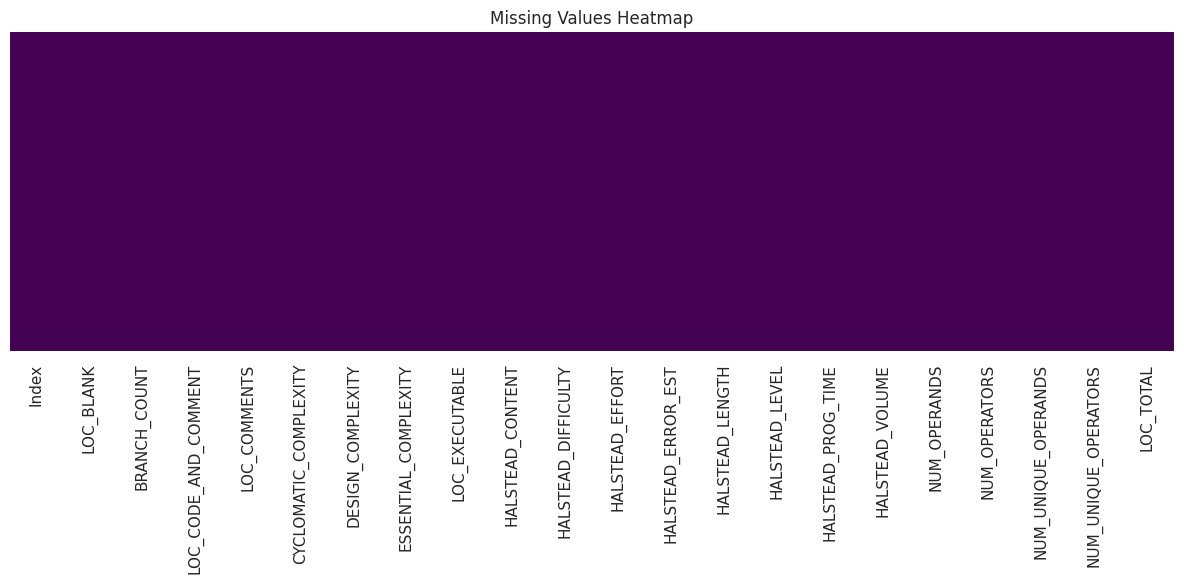

In [8]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0


In [10]:
# Identify potential target variable (assuming last column is the target)
# Adjust this according to your dataset structure
potential_target = df.columns[-1]
print(f"Potential target variable: {potential_target}")

# Check class distribution if the target is binary
if df[potential_target].nunique() <= 2:
    print("\nClass distribution:")
    class_dist = df[potential_target].value_counts(normalize=True) * 100
    print(class_dist)

    # Visualize class distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x=potential_target, data=df)
    plt.title('Class Distribution')
    plt.show()

Potential target variable: LOC_TOTAL


In [11]:
# Statistical summary of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Index,1676.0,837.500000,483.963842,0.0,418.75,837.500,1256.2500,1675.00
LOC_BLANK,1676.0,1.801313,3.791021,0.0,0.00,0.000,2.0000,35.00
BRANCH_COUNT,1676.0,4.766706,7.998350,1.0,1.00,1.000,5.0000,89.00
LOC_CODE_AND_COMMENT,1676.0,0.124702,0.690636,0.0,0.00,0.000,0.0000,12.00
LOC_COMMENTS,1676.0,0.939141,3.144651,0.0,0.00,0.000,0.0000,44.00
CYCLOMATIC_COMPLEXITY,1676.0,2.887232,4.001469,1.0,1.00,1.000,3.0000,45.00
DESIGN_COMPLEXITY,1676.0,2.594869,3.494295,1.0,1.00,1.000,3.0000,45.00
ESSENTIAL_COMPLEXITY,1676.0,1.701074,2.240634,1.0,1.00,1.000,1.0000,26.00
LOC_EXECUTABLE,1676.0,14.931384,25.118051,0.0,1.00,5.000,17.0000,262.00
HALSTEAD_CONTENT,1676.0,21.696814,21.920083,0.0,5.80,14.565,30.0900,193.06


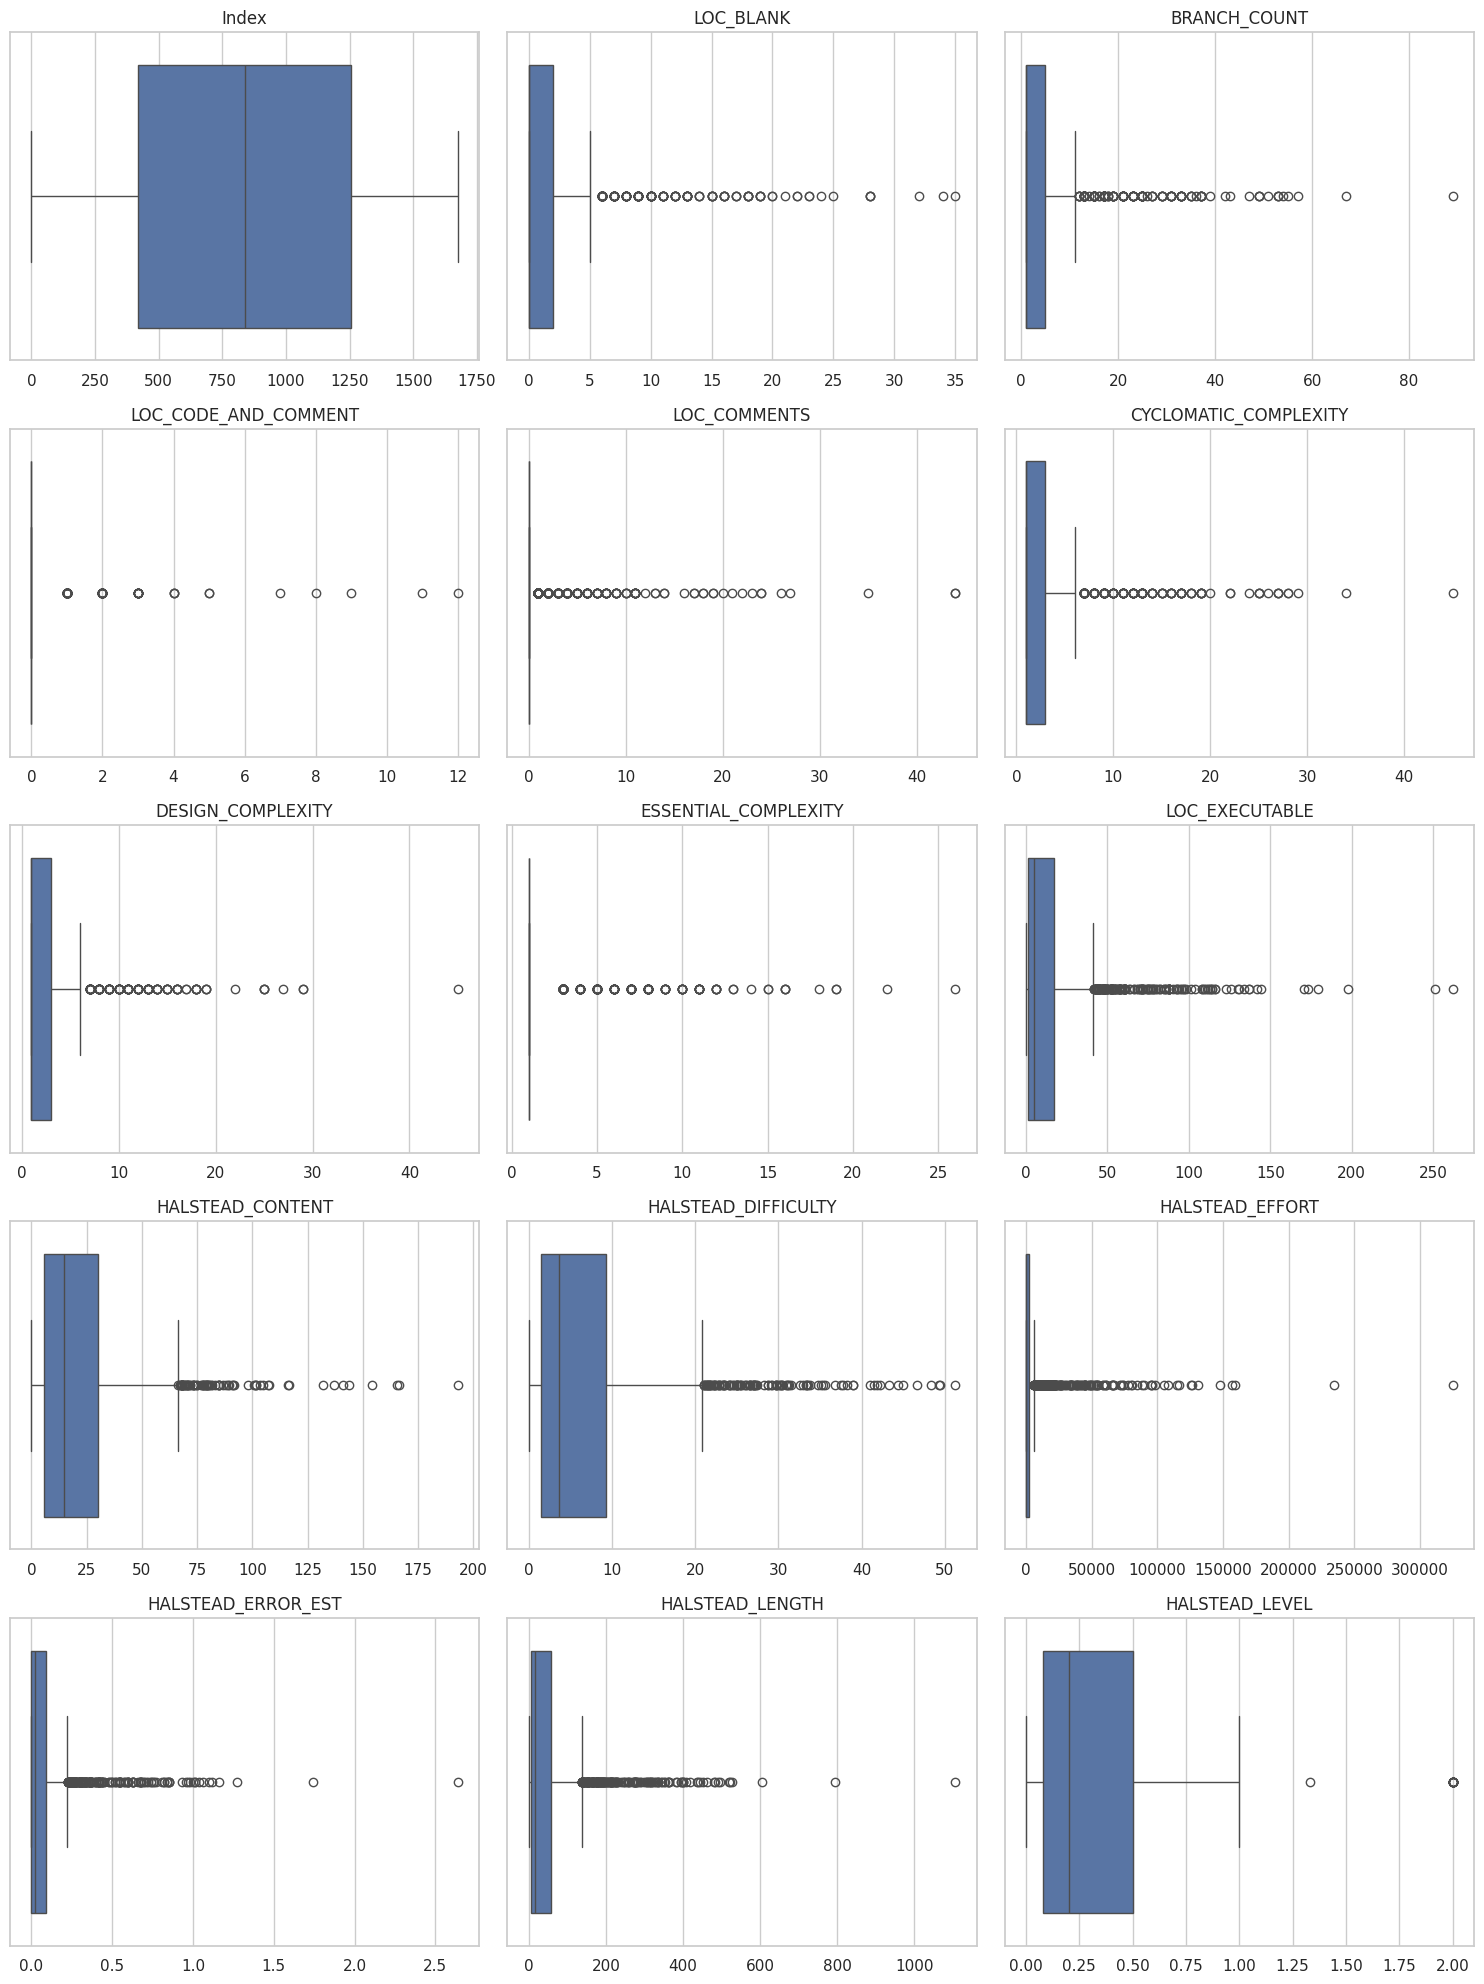

In [12]:
# Identify and handle outliers
def plot_boxplots(dataframe, features, ncols=3):
    nrows = int(np.ceil(len(features) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if i < len(axes):
            sns.boxplot(x=dataframe[feature], ax=axes[i])
            axes[i].set_title(feature)
            axes[i].set_xlabel('')

    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Plot boxplots for numerical features (limit to first 15 for readability)
plot_boxplots(df, numerical_features[:15])

In [ ]:
# Function to handle missing values
def handle_missing_values(dataframe, strategy='median'):
    numerical_cols = dataframe.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = dataframe.select_dtypes(include=['object', 'category']).columns

    # For numerical columns
    if strategy == 'median':
        # SimpleImputer replaces missing values with the median of each column
        imputer = SimpleImputer(strategy='median')
        dataframe[numerical_cols] = imputer.fit_transform(dataframe[numerical_cols])

    elif strategy == 'mean':
        # SimpleImputer replaces missing values with the mean of each column
        imputer = SimpleImputer(strategy='mean')
        dataframe[numerical_cols] = imputer.fit_transform(dataframe[numerical_cols])

    elif strategy == 'knn':
        # KNNImputer replaces missing values using the K-Nearest Neighbors approach
        # It finds the 'n_neighbors' (here = 5) closest rows and uses their values to estimate the missing data
        imputer = KNNImputer(n_neighbors=5)
        dataframe[numerical_cols] = imputer.fit_transform(dataframe[numerical_cols])

    elif strategy == 'iterative':
        # IterativeImputer models each column with missing values as a regression problem
        # It predicts missing values using other columns iteratively until convergence (here max 10 iterations)
        # random_state ensures reproducibility
        imputer = IterativeImputer(max_iter=10, random_state=42)
        dataframe[numerical_cols] = imputer.fit_transform(dataframe[numerical_cols])

    # For categorical columns
    for col in categorical_cols:
        if dataframe[col].isnull().any():
            dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])

    return dataframe

# Apply the chosen imputation strategy
imputation_strategy = 'median'  # Choose from 'median', 'mean', 'knn', 'iterative'
df_cleaned = handle_missing_values(df.copy(), strategy=imputation_strategy)

# Verify missing values are handled
remaining_missing = df_cleaned.isnull().sum().sum()
print(f"Remaining missing values after imputation: {remaining_missing}")

Remaining missing values after imputation: 0


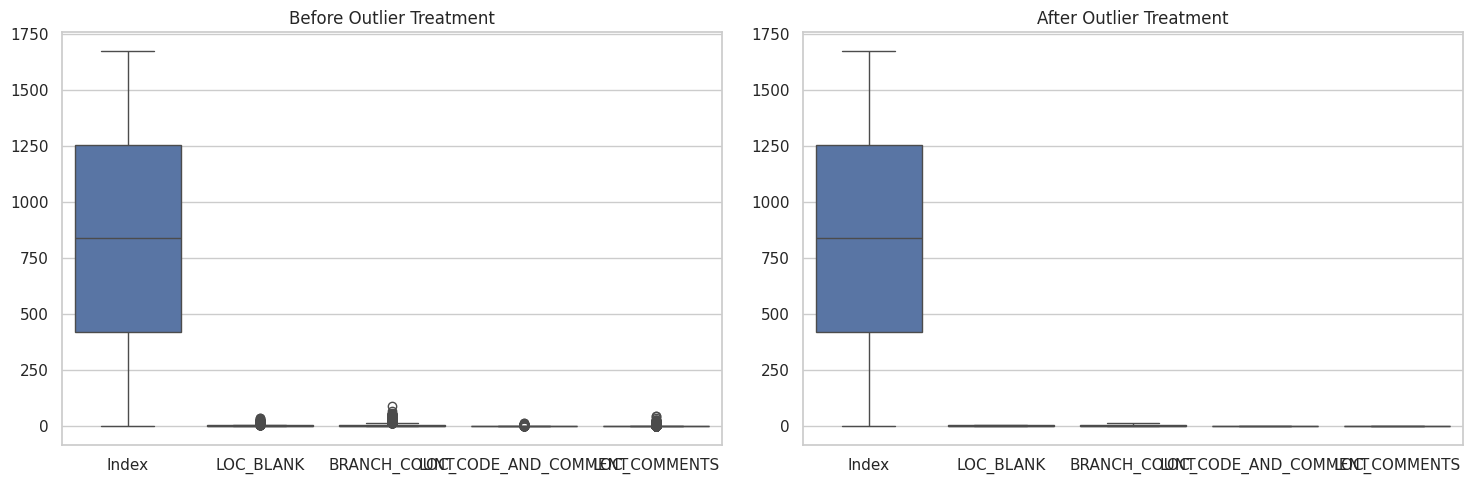

In [14]:
# Function to detect and handle outliers
def handle_outliers(dataframe, method='iqr', columns=None):
    if columns is None:
        columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

    df_no_outliers = dataframe.copy()

    for col in columns:
        if method == 'iqr':
            # IQR method
            Q1 = df_no_outliers[col].quantile(0.25)
            Q3 = df_no_outliers[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers
            df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

        elif method == 'zscore':
            # Z-score method
            from scipy import stats
            z_scores = stats.zscore(df_no_outliers[col])
            abs_z_scores = np.abs(z_scores)
            filtered_entries = (abs_z_scores < 3)  # Keep only entries with z-score < 3

            # Replace outliers with median
            median_value = df_no_outliers[col].median()
            df_no_outliers.loc[~filtered_entries, col] = median_value

    return df_no_outliers

# Apply outlier handling
outlier_method = 'iqr'  # Choose between 'iqr' and 'zscore'
df_no_outliers = handle_outliers(df_cleaned, method=outlier_method)

# Compare distributions before and after outlier handling
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_cleaned[numerical_features[:5]], ax=axes[0])
axes[0].set_title('Before Outlier Treatment')
sns.boxplot(data=df_no_outliers[numerical_features[:5]], ax=axes[1])
axes[1].set_title('After Outlier Treatment')
plt.tight_layout()
plt.show()

Scaling transforms all features to a similar scale so that no feature unfairly dominates the learning process.

Applied two methods:

StandardScaler → transforms data so that each feature has:

Mean = 0

Standard deviation = 1
(values are standardized into Z-scores)

MinMaxScaler → transforms values to fit within a fixed range, usually [0,1].

Example: 50 in a column ranging 0–100 becomes 0.5.

Boxplots after scaling will show that all features are now comparable in range (centered around 0 for StandardScaler or between 0–1 for MinMaxScaler).

Machine Learning Models Depend on Scale

Distance-based models (KNN, K-Means, PCA, SVM with RBF kernel) → Sensitive to magnitude differences.

Gradient-based models (Logistic Regression, Neural Nets) → Converge faster when features are on similar scales.

Avoids Bias from Larger Ranges

Without scaling, features with larger numerical ranges dominate model training.

Example: If "Income" ranges in lakhs and "Age" in tens, the model may pay more attention to Income.

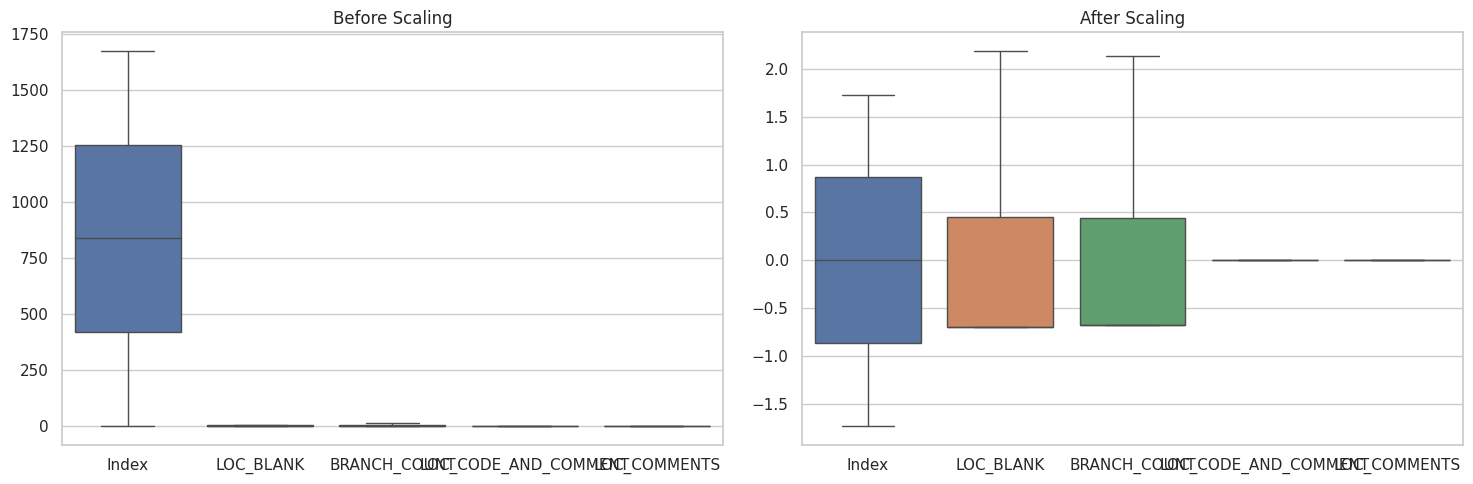

In [15]:
# Feature scaling
def scale_features(dataframe, method='standard'):
    df_scaled = dataframe.copy()
    columns_to_scale = df_scaled.select_dtypes(include=['int64', 'float64']).columns

    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()

    df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

    return df_scaled, scaler

# Apply scaling
scaling_method = 'standard'  # Choose between 'standard' and 'minmax'
df_scaled, scaler = scale_features(df_no_outliers, method=scaling_method)

# Compare distributions before and after scaling
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_no_outliers[numerical_features[:5]], ax=axes[0])
axes[0].set_title('Before Scaling')
sns.boxplot(data=df_scaled[numerical_features[:5]], ax=axes[1])
axes[1].set_title('After Scaling')
plt.tight_layout()
plt.show()

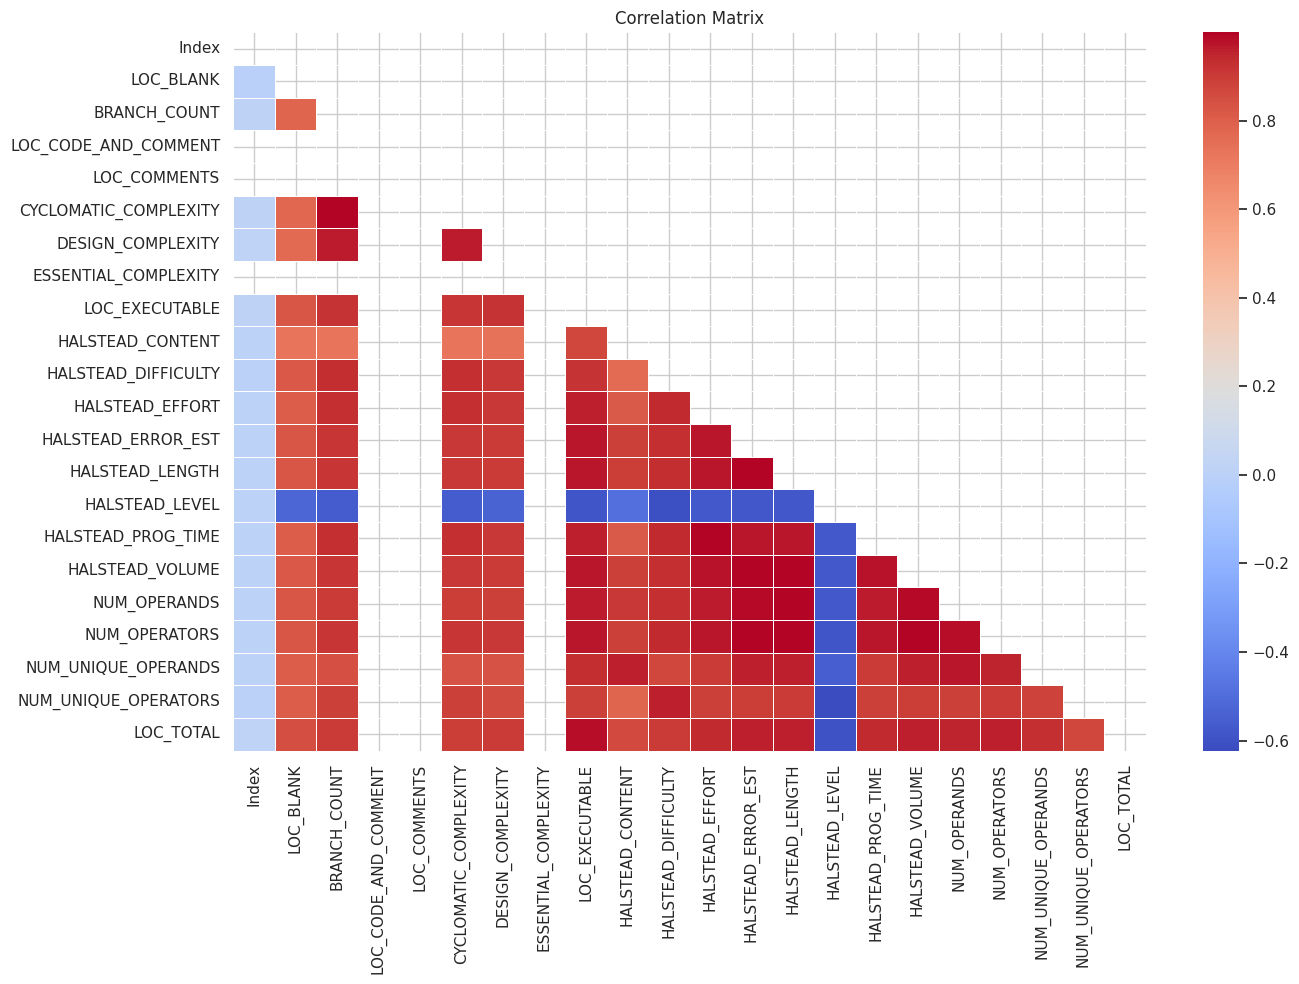

In [16]:
# Correlation analysis
correlation_matrix = df_scaled[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
# Save the preprocessed data
df_scaled.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_data.csv'")

Preprocessed data saved to 'preprocessed_data.csv'


## Preprocessing Summary

1. **Data Loading**: Loaded the dataset and analyzed its basic properties
2. **Missing Values**: Identified and handled missing values using the {imputation_strategy} strategy
3. **Duplicates**: Checked and removed duplicate entries
4. **Outliers**: Detected and handled outliers using the {outlier_method} method
5. **Feature Scaling**: Applied {scaling_method} scaling to normalize feature ranges
6. **Correlation Analysis**: Analyzed feature correlations to identify potential redundancies

The preprocessed dataset is now ready for feature selection and model training.